In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_palette("Set2")
plt.rc('font', family='Comic Sans MS')

In [3]:
cars = pd.read_csv("electric_cars.csv")

In [13]:
cars.head(5)

,title,availability,seats,range km,efficiency Wh/km,weight kg,acceleration sec,battery kWh,fastcharge kW,towweight kg,cargo L,price euro
0,BMW iX3 50 xDrive (MY26),Available to order since September 2025,5,610,178,2360,4.9,108.7,225,2000,578,68900
1,MG MG4 Electric 64 kWh,Available to order since October 2022,5,360,171,1726,7.9,61.7,115,500,363,39990
2,Mercedes-Benz CLA 250+,Available to order since May 2025,5,585,145,2055,6.7,85.0,235,1500,506,55859
3,Fiat 500e Hatchback 42 kWh,Available to order since November 2020,4,235,159,1365,9.0,37.3,67,0,185,34990
4,Tesla Model 3 Long Range RWD (Highland),Available to order since October 2025,5,580,136,1822,5.2,79.0,120,1000,682,45970


# scatter plot

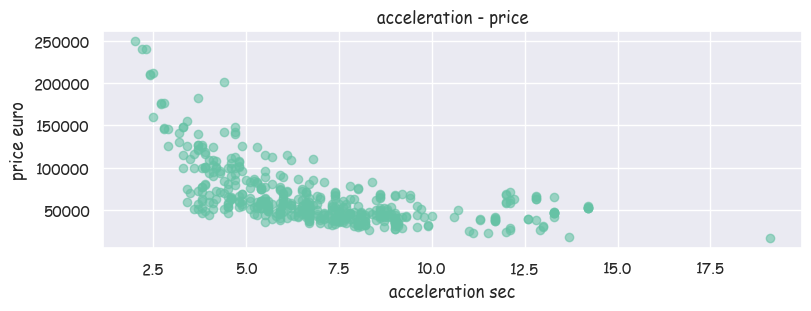

In [52]:
fig, ax = plt.subplots(figsize = (8, 3), layout="constrained")
ax.scatter(x=cars["acceleration sec"], y=cars["price euro"], alpha = 0.6)
ax.set_xlabel("acceleration sec")
ax.set_ylabel("price euro")
ax.set_title("acceleration - price")
plt.show()

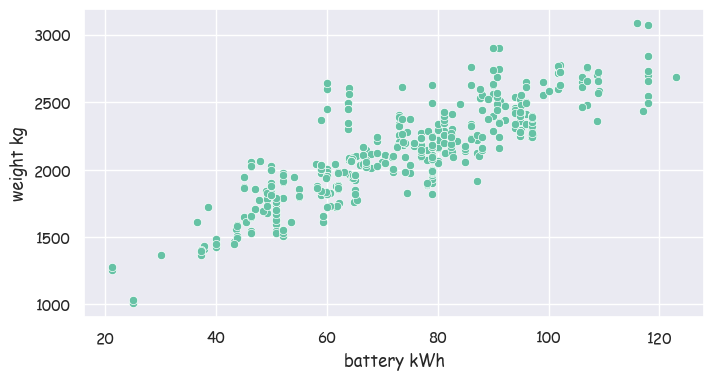

In [53]:
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(cars, x="battery kWh", y="weight kg", ax=ax)
plt.show()

In [20]:
np.average(cars["price euro"])

np.float64(64881.86974789916)

# histgram

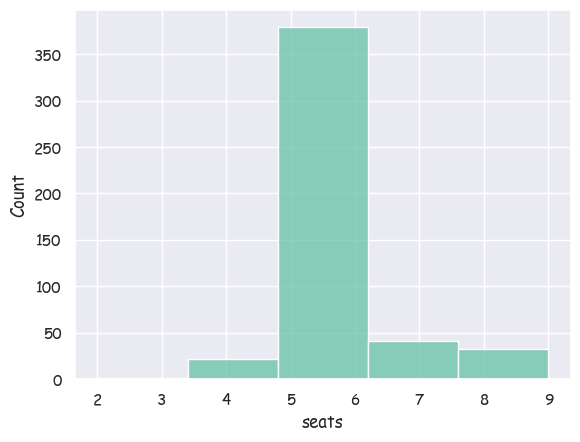

In [54]:
sns.histplot(cars, x="seats", bins=5)
plt.show()

# bar chart(countplot)

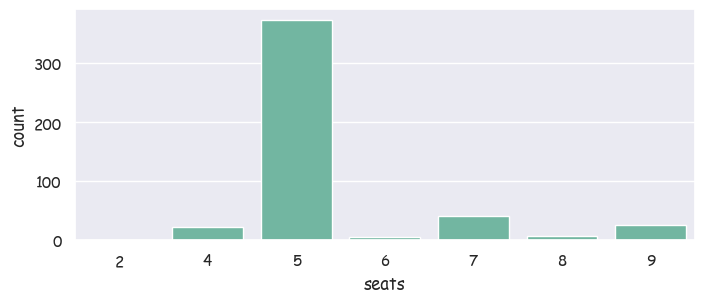

In [55]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.countplot(cars, x="seats", ax=ax)
plt.show()

# bar chart(barplot)

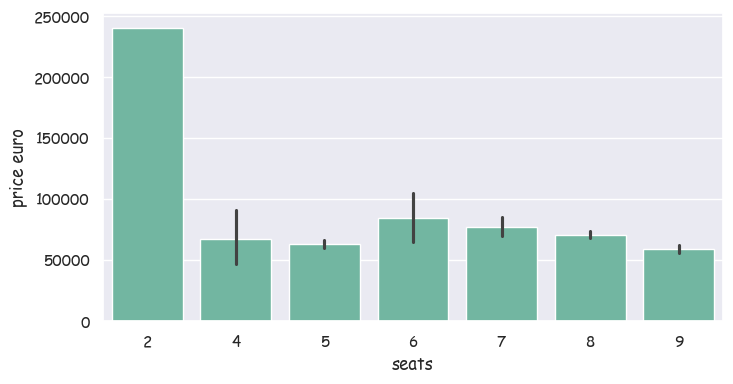

In [56]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.barplot(cars, x="seats", y="price euro", ax=ax)
plt.show()

In [34]:
cars[cars["seats"]==2]

,title,availability,seats,range km,efficiency Wh/km,weight kg,acceleration sec,battery kWh,fastcharge kW,towweight kg,cargo L,price euro
347,Porsche Taycan Turbo GT Weissach,Available to order since March 2024,2,475,204,2295,2.2,97.0,262,0,451,240000


# extract string and group by

In [37]:
np.sum(cars["title"].str.contains("BMW"))

np.int64(21)

In [39]:
cars["manufacturer"]=cars["title"].str.split(" ").str[0]
cars["manufacturer"]

0                BMW
1                 MG
2      Mercedes-Benz
3               Fiat
4              Tesla
           ...      
471             Opel
472       Volkswagen
473       Volkswagen
474          Porsche
475       Volkswagen
Name: manufacturer, Length: 476, dtype: object

In [40]:
cars.groupby("manufacturer").size().sort_values(ascending=False)

manufacturer
Mercedes-Benz    41
Volkswagen       35
Audi             28
Porsche          26
Ford             21
BMW              21
Volvo            21
Kia              18
Peugeot          18
Škoda            18
Smart            17
Opel             17
BYD              15
Citroën          14
Tesla            12
Toyota           12
Hyundai          12
Polestar         11
XPENG             9
Renault           8
Mini              8
Fiat              7
MG                6
Nissan            6
NIO               6
Lucid             6
GWM               6
CUPRA             6
Leapmotor         5
DS                5
Abarth            4
Cadillac          4
Lotus             4
TOGG              4
Changan           3
Alpine            2
VinFast           2
Dacia             2
Genesis           2
Jeep              2
Lexus             2
Alfa              2
Mazda             2
Maserati          1
Subaru            1
Honda             1
KGM               1
Maxus             1
Lynk&Co           1
dtype: 

## regular expression

In [43]:
#cars["title"].str.extract("^([a-zA-Z]+) ")
cars["title"].str.extract("^([^ ]+) ")

,0
0,BMW
1,MG
2,Mercedes-Benz
3,Fiat
4,Tesla
...,...
471,Opel
472,Volkswagen
473,Volkswagen
474,Porsche


<Axes: ylabel='manufacturer'>

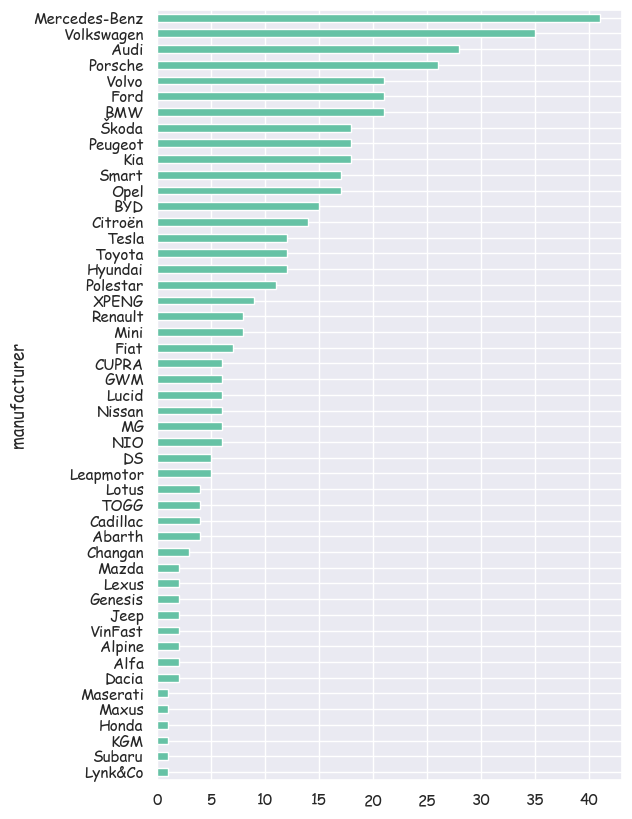

In [57]:
cars.groupby("manufacturer").size().sort_values().plot.barh(figsize=(6,10))

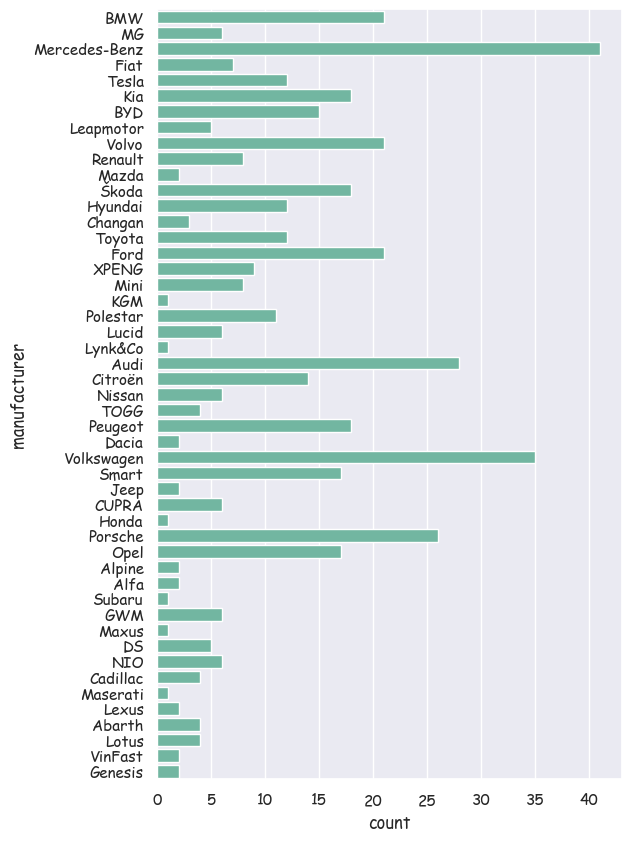

In [75]:
fig, ax = plt.subplots(figsize=(6,10)) 
sns.countplot(cars, y="manufacturer", ax=ax)
plt.show()

In [ ]:
cars["date"] = cars["availability"].str.extract(r"(?<=since\s)(.*)")
cars["date"]
cars

,title,availability,seats,range km,efficiency Wh/km,weight kg,acceleration sec,battery kWh,fastcharge kW,towweight kg,cargo L,price euro,manufacturer,date
0,BMW iX3 50 xDrive (MY26),Available to order since September 2025,5,610,178,2360,4.9,108.7,225,2000,578,68900,BMW,September 2025
1,MG MG4 Electric 64 kWh,Available to order since October 2022,5,360,171,1726,7.9,61.7,115,500,363,39990,MG,October 2022
2,Mercedes-Benz CLA 250+,Available to order since May 2025,5,585,145,2055,6.7,85.0,235,1500,506,55859,Mercedes-Benz,May 2025
3,Fiat 500e Hatchback 42 kWh,Available to order since November 2020,4,235,159,1365,9.0,37.3,67,0,185,34990,Fiat,November 2020
4,Tesla Model 3 Long Range RWD (Highland),Available to order since October 2025,5,580,136,1822,5.2,79.0,120,1000,682,45970,Tesla,October 2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Opel Zafira Electric 50 kWh,Available to order since January 2024,9,180,257,2027,13.3,46.3,78,1000,603,47550,Opel,January 2024
472,Volkswagen e-Transporter Kombi L2 100 kW 64 kWh,Available to order since March 2025,9,250,255,2348,12.8,63.8,75,2000,1000,63725,Volkswagen,March 2025
473,Volkswagen e-Caravelle L1 210 kW 64 kWh,Available to order since March 2025,9,250,255,2448,7.4,63.8,75,2000,800,70210,Volkswagen,March 2025
474,Porsche Taycan Turbo Sport Turismo,Available to order since February 2024,5,505,192,2390,2.7,97.0,262,0,489,176600,Porsche,February 2024


In [74]:
cars["year"] = cars["availability"].str.extract(r"(\d+)$")
cars["year"] = cars["year"].astype("int")
cars["year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 476 entries, 0 to 475
Series name: year
Non-Null Count  Dtype
--------------  -----
476 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB
